# **NumPy 기본: 배열과 벡터 연산** 

## **3.배열을 이용한 배열 지향 프로그래밍**

### **3.1 배열 연산으로 조건절 표현하기**

     - where:x if조건 else y 같은 삼항식의 벡터화 버전, numpy 함수
      - 다른 배열을 기반한 새로운 배열을 생성
      - 두 번째, 세 번째 인자는 배열이 아닐 수 있음

In [ ]:
import numpy as np

xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

[예제: cond의 값이 True 일 때는 xarr의 값을 취하고 아니면  yarr의 값을 취하기]

     - 리스트 표기법(list comprehension): 리스트 생성과 리스트의 데이터를 채우는 과정을 하나로 합친 것

     일반적인 구문: [ <표현식> for <변수명> in <시퀀스> ] 



[리스트 표기법 사용]
 - 열혈 파이썬 중급편

In [ ]:
#'홀수 값만 2를 곱해 가져오기' 방법 1
r1 = [1,2,3,4,5]
r2 = []                  
for i in r1:
    if i %2 :                   # i가 홀수인 경우에만 아래 문장 실행 (0은 거짓, 그 외의 숫자는 참으로 보므로)
        r2.append(i*2)          # i * 의 결과를 리스트에 담는다. 

r2

[2, 6, 10]

In [ ]:
#'홀수 값만 2를 곱해 가져오기'방법 2
r1 = [1,2,3,4,5]
r2 = [ x*2 for x in r1 if x %2]         # if절이 추가된 리스트 컴프리헨션
r2

[2, 6, 10]

In [ ]:
#예제: cond의 값이 True 일 때는 xarr의 값을 취하고 아니면 yarr의 값을 취하기
result = [(x if c else y)
          for x, y, c in zip(xarr, yarr, cond)] #zip(): ()안의 원소들을 묶어줌 
result

[1.1, 2.2, 1.3, 1.4, 2.5]

[예제: cond의 값이 True 일 때는 xarr의 값을 취하고 아니면 yarr의 값을 취하기]

[np.where 사용한 방법]


In [ ]:
result=np.where(cond,xarr,yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

[예제: 임의로 생성된 데이터가 들어 있는 행렬이 있고 양수는 모두 2로, 음수는 모두 -2로 바꾸기]

In [ ]:
arr = np.random.randn(4, 4)
arr

array([[ 1.53228539,  0.57994753, -1.05687195, -0.19481899],
       [-0.4320737 ,  0.02786789,  1.3729149 ,  1.92237778],
       [ 0.98402731, -0.26868491, -0.75389808, -0.01504539],
       [-0.64281213, -0.29617414, -2.29015286, -0.54035497]])

In [ ]:
arr > 0 #boolean 배열 만들어내기

array([[ True,  True, False, False],
       [False,  True,  True,  True],
       [ True, False, False, False],
       [False, False, False, False]])

In [ ]:
np.where(arr>0, 2, -2)

array([[ 2,  2, -2, -2],
       [-2,  2,  2,  2],
       [ 2, -2, -2, -2],
       [-2, -2, -2, -2]])

In [ ]:
np.where(arr>0, 2, arr)# 양수인 경우에만 2를 대입

array([[ 2.        ,  2.        , -1.05687195, -0.19481899],
       [-0.4320737 ,  2.        ,  2.        ,  2.        ],
       [ 2.        , -0.26868491, -0.75389808, -0.01504539],
       [-0.64281213, -0.29617414, -2.29015286, -0.54035497]])

### **3.2 수학 메서드와 통계 메서드**

     - 배열 전체 혹은 배열에서 한 축을 따르는 자료에 대한 통계를 계산하는 수학 함수는 배열 메서드로 사용
     - 전체의 합(sum), 평균(mean), 표준편차(std), Numpy의 최상위 함수를 이용하거나 배열의 인스턴스 메서드를 사용

In [ ]:
arr = np.random.randn(5, 4)
arr

array([[ 1.5997789 , -1.07141961,  1.00719911, -0.4548689 ],
       [ 1.37982454,  0.42773451,  1.00469848, -0.91467547],
       [-0.79010892, -0.20273625,  1.27058335, -0.07999104],
       [ 0.72202813,  0.11802068,  0.36828294, -0.13616141],
       [ 1.50341552,  0.73804273,  0.38830498,  0.34249922]])

In [ ]:
# 평균 구하기: 배열의 인스턴스 메서드를 사용
arr.mean()

0.3610225753112587

In [ ]:
# 평균 구하기: Numpy의 최상위 함수를 이용
np.mean(arr)

0.3610225753112587

In [ ]:
arr.sum()

7.220451506225174

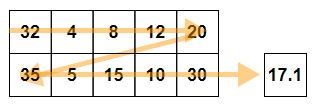

- 행 우선 계산( axis = 0 ): 각 열의 모든 행에 대해서 동작


- 열 우선 계산( axis = 1 ): 각 행의 모든 열에 대해서 동작


    - mean, sum: axis 인자를 받아서 axis에 대한 통계를 계산, 한 차수 낮은 배열을 반환

[행의 합을 구하기]
  - axis=0 으로 정함

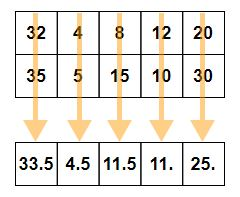

In [ ]:
#[행]=[axis=0]. 행 우선 계산이라는 건 그냥 결과로 행을 만들어준다고 생각하는 게 편할듯.
arr.mean(axis=0)

array([ 0.88298763,  0.00192841,  0.80781377, -0.24863952])

In [ ]:
#0만 써줘도 알아들음.
arr.mean(0)

array([ 0.88298763,  0.00192841,  0.80781377, -0.24863952])

[열의 평균을 구하기]
 -  axis=1로 정함 

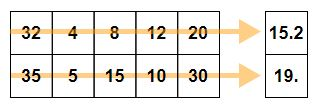

In [ ]:
arr.mean(axis=1)

array([0.27017237, 0.47439551, 0.04943679, 0.26804259, 0.74306561])

In [ ]:
arr.mean(1)

array([0.27017237, 0.47439551, 0.04943679, 0.26804259, 0.74306561])

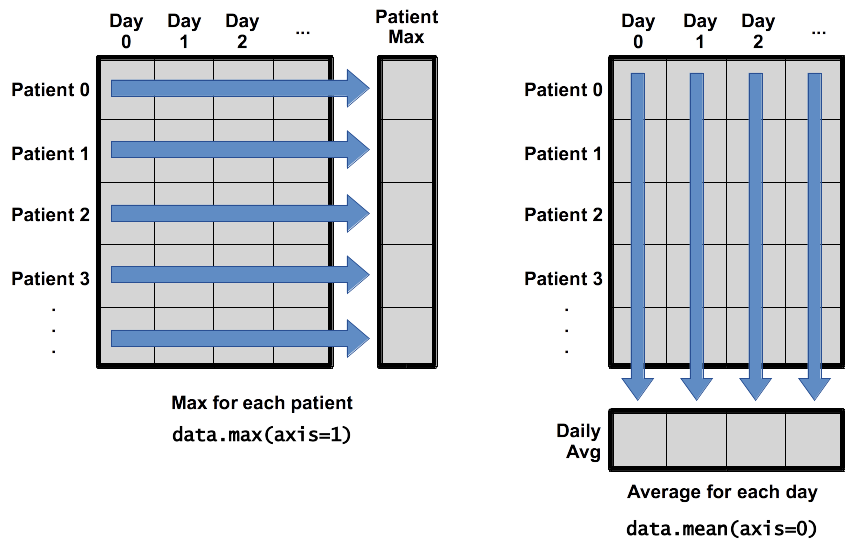

https://clemsonciti.github.io/python-workshop/01-numpy/

     - cumsum : 누적 합의 중간 계산 값을 계산하는 함수 
      - 다차원 배열에서 같은 크기의 배열을 반환
      - 축을 지정하여 부분적으로 계산하면 낮은 차수의 슬라이스를 반환 

In [ ]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
# 누적 합
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28])

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6, 7])
# 누적 곱
arr.cumprod()

array([   1,    2,    6,   24,  120,  720, 5040])

In [ ]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [ ]:
arr1=arr.cumsum(axis=0)
arr1

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

In [ ]:
arr2=arr.cumprod(axis=1)
arr2

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]])

**배열 통계 메서드**

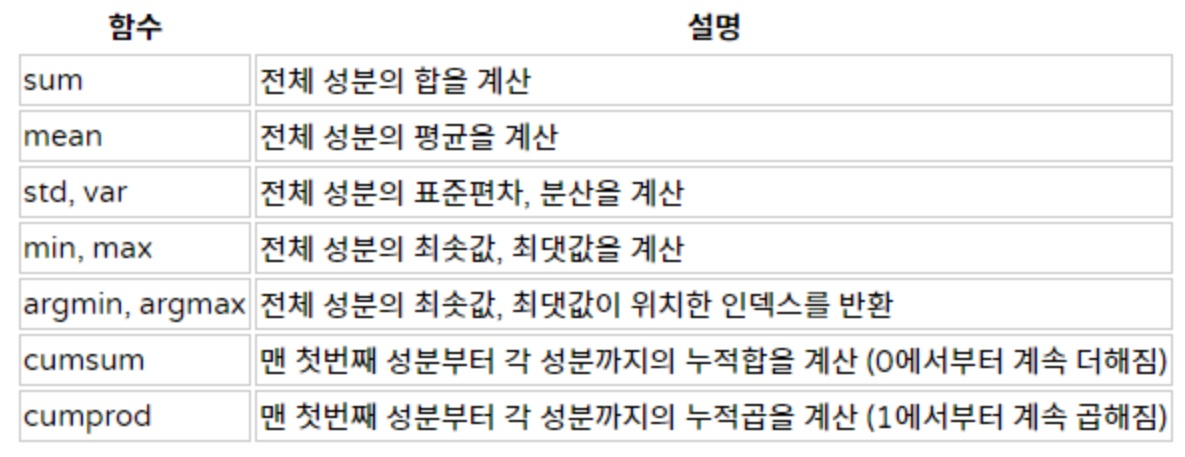

### **3.3 불리언 배열을 위한 메서드**

    - 메서드의 블리언 값을 1(True) 또는 0(False)으로 강제할 수 있음

In [ ]:
arr = np.random.randn(100)
# 양수인 원소의 개수
(arr>0).sum() #양수인 원소의 개수

46

     - all: 모든 원소가 True인지 검사 
     - any: 하나 이상의 값이 True인지 검사

In [ ]:
bools = np.array([False, False, True, False])

In [ ]:
bools.any()

True

In [ ]:
bools.all()

False

### **3.4 정렬**

     - sort : 원소를 정렬
       -  np.sort(x) 메소드: 배열을 직접 변경하기 않고 정렬된 결과를 가지고 있는 복사본을 반환
       -  x.sort() 메소드: 원래의 배열 자체를 정렬



In [ ]:
arr = np.random.randn(6)
arr

array([-0.02475458,  1.86122326, -1.92207503, -1.32058391,  0.10248933,
       -1.13011089])

In [ ]:
arr1=np.sort(arr)
arr #원본 배열은 그대로 보존

array([-0.02475458,  1.86122326, -1.92207503, -1.32058391,  0.10248933,
       -1.13011089])

In [ ]:
arr1

array([-1.92207503, -1.32058391, -1.13011089, -0.02475458,  0.10248933,
        1.86122326])

In [ ]:
arr.sort()
arr

array([-1.92207503, -1.32058391, -1.13011089, -0.02475458,  0.10248933,
        1.86122326])

     - 다차원 배열의 정렬은 축의 값에 따라 1 차원 부분 정렬

In [ ]:
arr = np.random.randn(5, 3)
arr

array([[ 0.8739344 , -0.38669044, -0.62745632],
       [-1.93733916,  0.60683162,  0.4095048 ],
       [-0.02195647, -0.55715552, -0.10531601],
       [-0.05768798, -0.73291624, -1.57789826],
       [ 0.59798626, -2.00812578, -0.12964612]])

In [ ]:
# Axis = 0
arr.sort(0)
arr

array([[-1.93733916, -2.00812578, -1.57789826],
       [-0.05768798, -0.73291624, -0.62745632],
       [-0.02195647, -0.55715552, -0.12964612],
       [ 0.59798626, -0.38669044, -0.10531601],
       [ 0.8739344 ,  0.60683162,  0.4095048 ]])

In [ ]:
# Axis =1
arr.sort(1)
arr

array([[-2.00812578, -1.93733916, -1.57789826],
       [-0.73291624, -0.62745632, -0.05768798],
       [-0.55715552, -0.12964612, -0.02195647],
       [-0.38669044, -0.10531601,  0.59798626],
       [ 0.4095048 ,  0.60683162,  0.8739344 ]])

In [ ]:
arr

array([[-2.00812578, -1.93733916, -1.57789826],
       [-0.73291624, -0.62745632, -0.05768798],
       [-0.55715552, -0.12964612, -0.02195647],
       [-0.38669044, -0.10531601,  0.59798626],
       [ 0.4095048 ,  0.60683162,  0.8739344 ]])

[응용: 백분위 구하기]

     - 배열을 정렬한 후 특정 분위의 값을 선택 

In [ ]:
large_arr=np.random.randn(1000)
large_arr.sort()
large_arr[int(0.05*len(large_arr))] #5%분위수. 1000중 5번째의 index를 구할 수 있는 것
                #index는 항상 정수값이여야 하므로 

-1.6456238237765592

### **3.5 집합 관련 함수**

     - unique: 배열 내에서 중복된 원소를 제거하고 원소를 정렬된 형태로 반환

In [ ]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [ ]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

[numpy대신 파이썬 기본 함수 사용해보기: unique 함수 기능 수행하기]

In [ ]:
sorted(set(names))

['Bob', 'Joe', 'Will']

     - in1d: 두 개의 배열을 인자로 받아서 첫 번째 배열의 원소가 두 번째 배열의 원소를 포함하는지 나타내는 불리언 배열을 반환 

In [ ]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2,3,6])

array([ True, False, False,  True,  True, False,  True])

## **4. 배열 데이터의 파일 입출력**

     - 디스크로부터 텍스트 또는 바이너리 형식의 데이터를 불러오거나 디스트에 저장할 수 있음
       - save: 배열 데이터를 디스크에 저장하기
        - 압축되지 않은 원시 바이너리 형식의 파일(npy)로 저장
       - load: 배열 데이터를 디스크로부터 읽기
        

[파일로 저장]

    - 확장자 npy가 자동으로 추가됨

In [ ]:
#구글 드라이브와 연동
from google.colab import drive
drive.mount('/content/gdrive')
directory_path = '/content/gdrive/My Drive/Colab Notebooks/'

Mounted at /content/gdrive


In [ ]:
import numpy as np

arr = np.arange(10)
np.save(directory_path+'some_array', arr)

[파일에서 데이터 읽어오기]

In [ ]:
np.load(directory_path+'some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

     - savez: 여러 개의 배열을 압축된 형식으로 저장
       - 저장하려는 배열을 키워드 인자 형태로 전달

In [ ]:
arr1 = arr+1 #arr배열의 각 원소에 1을 더한 것
np.savez(directory_path+'array_archive.npz', a=arr, b=arr1) #'a', 'b': 키워드. 

     - 각각의 배열을 필요할 때 불러올 수 있도록 사전 형식(dictionary)의 객체에 저장 

In [ ]:
arch=np.load(directory_path+'array_archive.npz')
arch['b']

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
arch['a']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

     - savez_compressed: 데이터를 압축해서 저장

In [ ]:
np.savez_compressed(directory_path+'arrays_compressed.npz', a=arr, b=arr)

In [ ]:
#만들어진 file을 지우기 위해
!rm '/content/gdrive/My Drive/Colab Notebooks/some_array.npy'
!rm '/content/gdrive/My Drive/Colab Notebooks/array_archive.npz'
!rm '/content/gdrive/My Drive/Colab Notebooks/arrays_compressed.npz'

## **5. 선행대수**

     - linalg: 행렬의 분할, 역행렬, 행렬식 등을 포함

|연산|함수|
|------------------|--------------------|
|단위행렬 (Unit matrix)| np.eye(n)|
|대각행렬 (Diagonal matrix)| np.diag(x)|
|내적 (Dot product, Inner product)| np.dot(a, b)|
|대각합 (Trace)| np.trace(x)|
|행렬식 (Matrix Determinant)| np.linalg.det(x)|
|역행렬 (Inverse of a matrix)| np.linalg.inv(x)|
|고유값 (Eigenvalue), 고유벡터 (Eigenvector)| w, v = np.linalg.eig(x)|
|특이값 분해 (Singular Value Decomposition)| u, s, vh = np.linalg.svd(A)|
|연립방정식 해 풀기 (Solve a linear matrix equation)| np.linalg.solve(a, b)|
|최소자승 해 풀기 (Compute the Least-squares solution)| m, c = np.linalg.lstsq(A, y, rcond=None)[0]|


출처: https://rfriend.tistory.com/380 

     - dot 함수: 행렬의 곱셉, numpy 함수
        -  * 연산자: 행렬 곱이 아닌 대응하는 각각의 원소의 곱을 계산

In [ ]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
x
y
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

      x.dot(y)와 np.dot(x,y)은 동일

In [ ]:
np.dot(x,y)

array([[ 28.,  64.],
       [ 67., 181.]])

     - 2차원 배열과 곱셉이 가능한 크기의 1차원 배열 간의 행렬 곱셈의 결과는 1차원 배열

In [ ]:
#강의에서는 넘어간 부분
np.dot(x,np.ones(3))

array([ 6., 15.])

     - @: 행렬 곱셈을 수행하는 연산(파이썬 3.5부터)

In [ ]:
#강의에서는 넘어간 부분
x @ np.ones(3)

array([ 6., 15.])

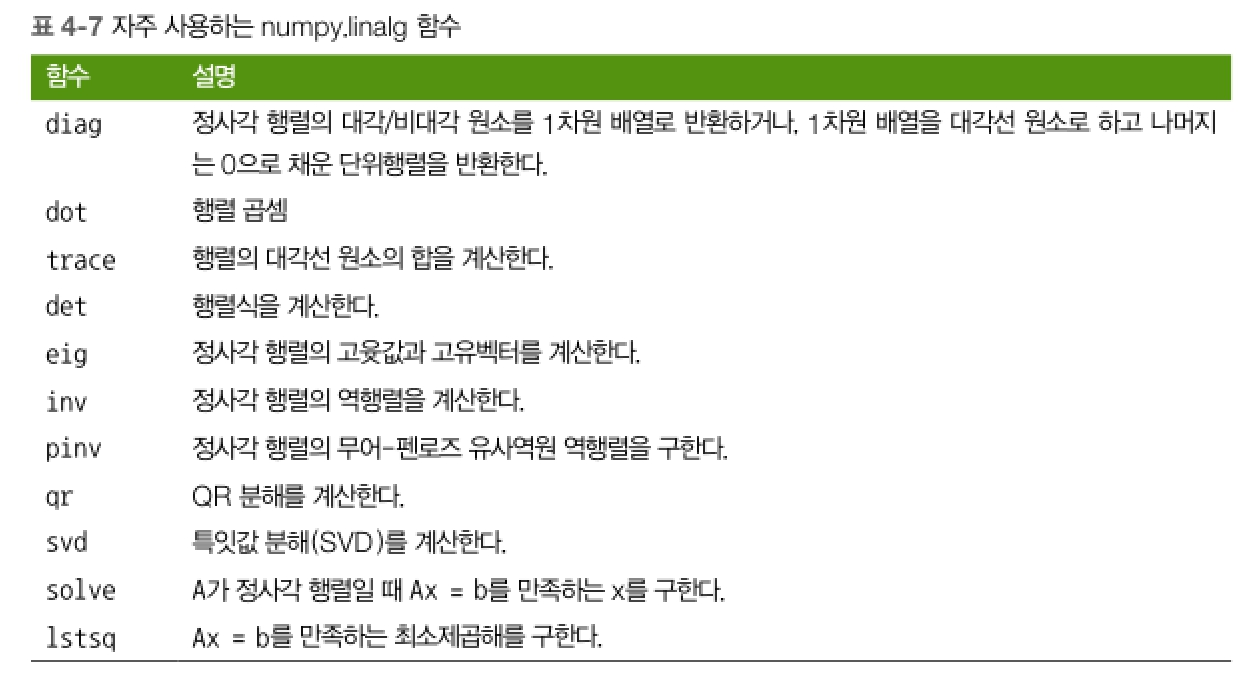

[linalg의 함수의 예]





In [ ]:
from numpy import matrixlib
from numpy.linalg import inv, qr
X = np.random.randn(5, 5)
mat=X.T.dot(X) #자기 자신을 dot하려면 transpose해야 가능하므로 X.T
mat

array([[ 8.38095015, -0.57478592,  2.0412382 , -0.2115102 , -1.82964971],
       [-0.57478592,  4.52465544,  2.16434735,  3.3776363 , -4.35725283],
       [ 2.0412382 ,  2.16434735,  4.8856898 ,  1.04020589, -4.91464264],
       [-0.2115102 ,  3.3776363 ,  1.04020589,  3.5540007 , -2.96281375],
       [-1.82964971, -4.35725283, -4.91464264, -2.96281375,  8.39554225]])

In [ ]:
#역행렬
inv(mat)

array([[ 0.15608473,  0.16295431, -0.07399756, -0.08666824,  0.04468563],
       [ 0.16295431,  1.27469763, -0.15195876, -0.92137119,  0.28296623],
       [-0.07399756, -0.15195876,  0.5906097 ,  0.24962354,  0.33883593],
       [-0.08666824, -0.92137119,  0.24962354,  1.11395813,  0.04217014],
       [ 0.04468563,  0.28296623,  0.33883593,  0.04217014,  0.48893974]])

In [ ]:
mat.dot(inv(mat))
q, r = qr(mat)
r

array([[-8.83910133, -0.48170395, -3.91537498, -0.34827497,  4.25336315],
       [ 0.        , -7.45984757, -5.66173861, -5.6839855 ,  9.89837254],
       [ 0.        ,  0.        , -3.25135555,  1.02297184,  2.71403584],
       [ 0.        ,  0.        ,  0.        , -0.68477745, -0.17586371],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.51148333]])

In [ ]:
q

array([[-0.94816767,  0.13827656,  0.27321161,  0.05148988,  0.06754158],
       [ 0.06502764, -0.61073359,  0.31951566,  0.58117073,  0.42769874],
       [-0.23093277, -0.27522092, -0.74531144, -0.23052551,  0.51214485],
       [ 0.02392893, -0.45432067,  0.44238419, -0.77022961,  0.06373946],
       [ 0.20699499,  0.57072782,  0.26846276, -0.11486392,  0.73902426]])

## **6. 난수 생성**

     - random: 다양한 종류의 확률분포로부터 효과적으로 표본값을 생성

|함수|설명|
|------------------|--------------------|
|seed|난수 생성기의 시드를 정함|
|permutation|순서를 임의로 바꾸거나 임의의 순열을 반환|
|shuffle|리스트나 배열의 순서를 뒤썩음|
|rand|균등분포에서 표본을 추출|
|randint|주어진 최소/최대 범위 안에서 임의의 난수를 추출|
|randn|표준편차가 1이고 평균값이 0인 정규분포에서 표본을 추출|
|binomial|이항분포에서 표본을 추출|
|normal|정규분포에서 표본을 추출|
|beta|베타분포에서 표본을 추출|
|chisquare|가이제곱분포에서 표본을 추출|
|gamma|감마분포에서 표본을 추출|
|uniform|균등[0,1)분포에서 표본을 추출|


- 우리가 사용하고 있는 난수는 완벽한 난수값이 아니라 유사난수임
- 유사난수: 난수 생성기의 시드값에 따라 알고리즘으로 정해진 난수를 생성 

[표준정규 분포에서 난수 생성]

In [ ]:
import numpy as np

samples=np.random.normal(size=(4,4))
samples

array([[ 0.37198651, -2.39210464, -0.35581432, -1.13674057],
       [-1.11812454, -0.46703765,  1.75013831, -0.8625907 ],
       [-1.00103544,  0.40855804,  1.65749386,  0.01861213],
       [ 0.66953915, -2.14425203,  0.54773981,  0.24992152]])

[numpy.random과 내장 random 모듈 비교]

In [ ]:
#내장 random모듈
from random import normalvariate
N = 1000000
# 한번에 하나의 값만을 생성
%timeit samples = [normalvariate(0, 1) for _ in range(N)] #list comprehension

1 loop, best of 5: 1.01 s per loop


In [ ]:
#numpy.random
%timeit np.random.normal(size=N)

10 loops, best of 5: 44.8 ms per loop


     - numpy.random.seed: 난수 생성기의 시드값 변경
        - numpy.random에서 제공하는 데이터를 생성할 수 있는 함수들은 전역 난수 시드값 사용
     - numpy.random.RandomState: 다른 난수 생성기로부터 격리된 난수 생성기 만들기
        - 선언시에 각 변수 마다 다른 값을 넣음으로서 하나의 코드상에서 다른 랜덤한 값을 출력 가능


In [ ]:
np.random.seed(1234)
r1=np.random.random(size=4)
r1

array([0.19151945, 0.62210877, 0.43772774, 0.78535858])

In [ ]:
np.random.seed(1234)
r2=np.random.random(size=4)
r2

array([0.19151945, 0.62210877, 0.43772774, 0.78535858])

In [ ]:
rng3=np.random.RandomState(5)
rng3.randn(10)

array([ 0.44122749, -0.33087015,  2.43077119, -0.25209213,  0.10960984,
        1.58248112, -0.9092324 , -0.59163666,  0.18760323, -0.32986996])

In [ ]:
rng4=np.random.RandomState(5)
rng4.randn(10)

array([ 0.44122749, -0.33087015,  2.43077119, -0.25209213,  0.10960984,
        1.58248112, -0.9092324 , -0.59163666,  0.18760323, -0.32986996])

In [ ]:
#다른 번호를 주면 다른 난수를 만들 수 있다
rng5=np.random.RandomState(7)
rng5.randn(10)

array([ 1.69052570e+00, -4.65937371e-01,  3.28201637e-02,  4.07516283e-01,
       -7.88923029e-01,  2.06557291e-03, -8.90385858e-04, -1.75472431e+00,
        1.01765801e+00,  6.00498516e-01])

---------------------------------------- **Numpy 끝** ----------------------------------------